In [1]:
## this is the code for the linerregration model

Iteration 0: Slope: 0.0012357233864945104, Intercept: 4.546918397352329e-19
Iteration 1: Slope: 0.0024689753262160307, Intercept: 9.001133172148457e-19
Iteration 2: Slope: 0.003699760762058109, Intercept: 1.3616330285515234e-18
Iteration 3: Slope: 0.004928084627028501, Intercept: 1.8273715873817766e-18
Iteration 4: Slope: 0.006153951844268955, Intercept: 2.276567823145115e-18
Iteration 5: Slope: 0.007377367327074925, Intercept: 2.750077943147744e-18
Iteration 6: Slope: 0.008598335978915286, Intercept: 3.2061575616637585e-18
Iteration 7: Slope: 0.009816862693451967, Intercept: 3.6757819010801994e-18
Iteration 8: Slope: 0.011032952354559573, Intercept: 4.180988888435877e-18
Iteration 9: Slope: 0.012246609836344964, Intercept: 4.6810333387270474e-18
Iteration 10: Slope: 0.013457840003166783, Intercept: 5.172029471367523e-18
Iteration 11: Slope: 0.014666647709654961, Intercept: 5.628053578732306e-18
Iteration 12: Slope: 0.015873037800730162, Intercept: 6.139422303874653e-18
Iteration 13: S

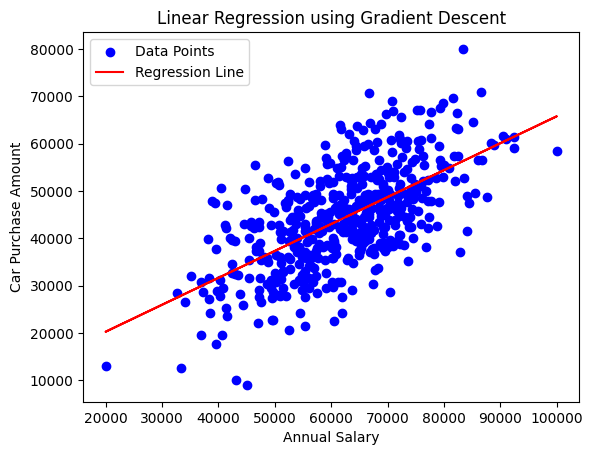

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("./Car_Purchasing_Data.csv")

# Extract features and target variable
X = np.array(data['Annual Salary'])
Y = np.array(data['Car Purchase Amount'])

# Normalize data
X_mean = np.mean(X)
X_std = np.std(X)
Y_mean = np.mean(Y)
Y_std = np.std(Y)

X_normalized = (X - X_mean) / X_std
Y_normalized = (Y - Y_mean) / Y_std

# Number of samples
no = np.size(X_normalized)

# Initialize slope and intercept
m_curr = 0
c_curr = 0

# Learning rate
learning_rate = 0.001

# Gradient Descent
for i in range(100000):
    y_per = m_curr * X_normalized + c_curr

    # Calculating derivatives
    md = -(2 / no) * sum(X_normalized * (Y_normalized - y_per))
    bd = -(2 / no) * sum(Y_normalized - y_per)

    # Update slope and intercept
    m_curr = m_curr - learning_rate * md
    c_curr = c_curr - learning_rate * bd

    print(f"Iteration {i}: Slope: {m_curr}, Intercept: {c_curr}")

# Denormalize the coefficients
m = m_curr * (Y_std / X_std)
c = c_curr * Y_std + Y_mean - m_curr * X_mean * (Y_std / X_std)

print("Final Slope:", m)
print("Final Intercept:", c)

# Plotting the data points
plt.scatter(X, Y, color='blue', label='Data Points')

# Plotting the regression line
regression_line = m * X + c
plt.plot(X, regression_line, color='red', label='Regression Line')

plt.xlabel('Annual Salary')
plt.ylabel('Car Purchase Amount')
plt.title('Linear Regression using Gradient Descent')
plt.legend()
plt.show()
